In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle as rect
from PIL import Image
from cite_on import *
from time import time
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [2]:
def draw_annotations(img, ann, gt=None,save=None):
    f,ax=plt.subplots(1,1,figsize=(15,15))
    #pic=(np.repeat(img[:,:,np.newaxis],3,axis=2)/255).astype(np.uint8)
    ax.imshow(img)
    for i in range(ann.shape[0]):
        ax.add_patch(rect((ann[i,0],ann[i,1]),ann[i,2]-ann[i,0],ann[i,3]-ann[i,1],linewidth=1, edgecolor='lime', facecolor='none'))
    if gt is not None:
        for i in range(gt.shape[0]):
            ax.add_patch(rect((gt[i,0],gt[i,1]),gt[i,2]-gt[i,0],gt[i,3]-gt[i,1],linewidth=1, edgecolor='magenta', facecolor='none'))
    if save is not None:
        plt.savefig(save,format='svg')
    plt.show()

def multiline_plot(x, save=None):
    plt.figure(figsize=(15,15))
    for i in range(x.shape[0]):
        plt.plot((x[i,:]/np.max(x[i,:]))+i)
    if save:
        plt.savefig(save,format='svg')
    plt.show()

def clustermap(a):
    f=plt.figure(figsize=(10,10))
    Z = linkage(a, 'average', 'euclidean')
    foo=leaves_list(Z)
    gs = f.add_gridspec(5,4, hspace=0) 
    ax0=plt.subplot(gs[0,:])
    ax1=plt.subplot(gs[1:,:])
    im=ax1.imshow(np.triu(a[:,foo][foo])+np.tril(a), cmap='seismic', clim=(-1,1), aspect='auto')
    ax0.axis('off')
    with plt.rc_context({'lines.linewidth': 0.5}):
        dendrogram(Z, truncate_mode='level', p=10, ax=ax0, no_labels=True, color_threshold=-np.inf, link_color_func=lambda x: 'k')



Import took: 23.43646502494812s
Median took: 15.065566301345825s


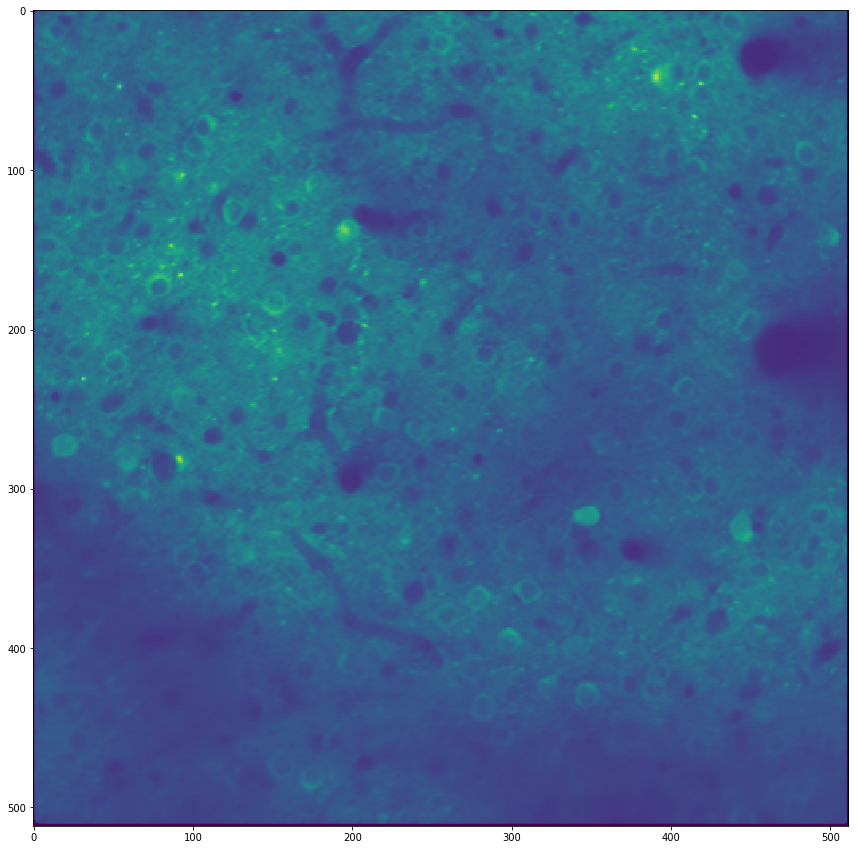

In [3]:
partial=time()
im=Image.open('/home/luca/Desktop/501271265_5000.tif')
img=np.ndarray((im.size[1],im.size[0],im.n_frames),dtype=np.uint16)
for i in range(im.n_frames):
    im.seek(i)
    fr=np.array(im)
    img[:,:,i]=fr.copy()
print('Import took: '+str(time()-partial)+'s')
partial=time()
# median=fast_median(img)
median=np.median(img,axis=2)
print('Median took: '+str(time()-partial)+'s')
plt.figure(figsize=(15,15))
plt.imshow(median)

INFO:tensorflow:Restoring parameters from /home/luca/agonia-0.1.0/7934_tf13/variables/variables
AGOnIA up 'n running!
Detection took: 0.9581122398376465s


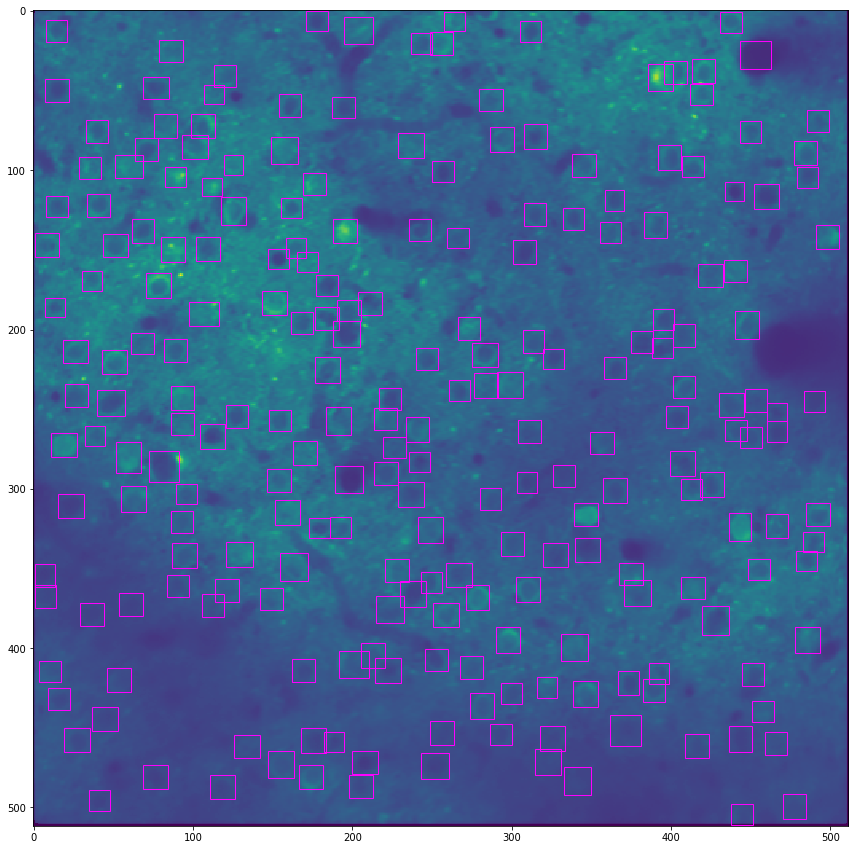

In [7]:
detector=Detector('wheights/', gpu='0', init_shape=img.shape[:2], init_upscaling=2)
partial=time()
boxes=detector.detect(median,threshold=0.35,upscaling=2)
print('Detection took: '+str(time()-partial)+'s')
draw_annotations(median,boxes, save='detections.svg')

/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / 

Trace extraction took: 119.10210990905762


/home/luca/anaconda3/envs/agonia/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 1080x1080 with 0 Axes>

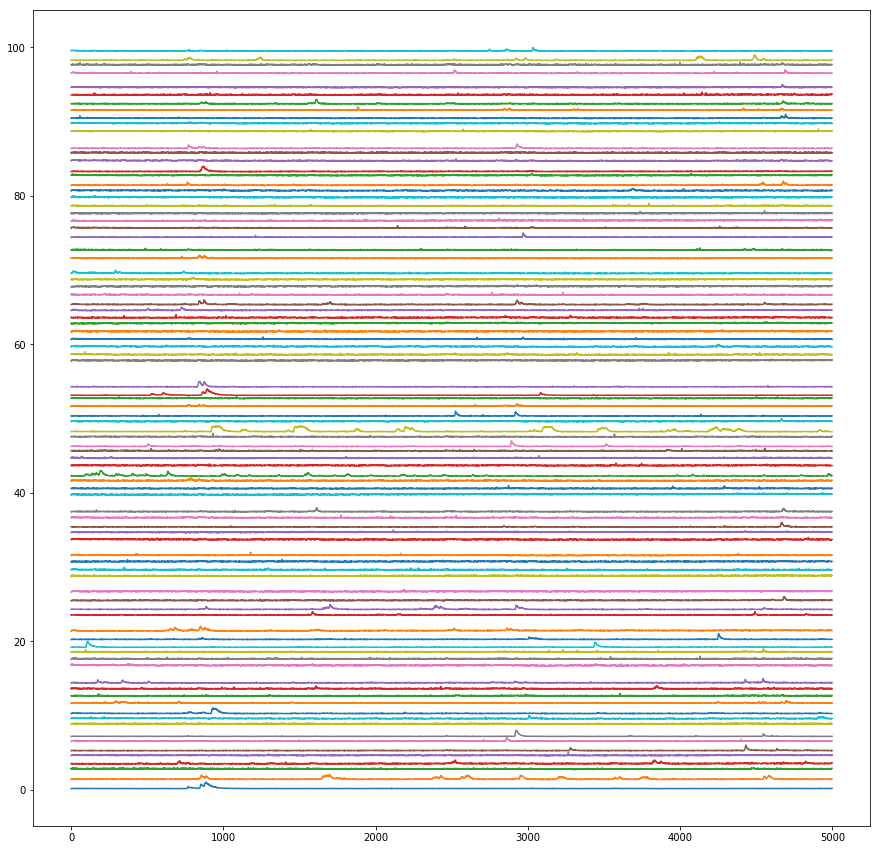

In [8]:
partial=time()
extractor=Extractor(workers=12)
for i in range(img.shape[2]):
    extractor.extract(img[:,:,i], boxes[:,:4])
traces=extractor.get_traces()
print('Trace extraction took: '+str(time()-partial))
plt.figure(figsize=(15,15))
multiline_plot(traces.T[:100,:])

In [ ]:
clustermap(np.corrcoef(traces.T))